# Image Dataset

- Import and flatten the image dataset to 60K, 784
- Write the reshaped image dataset to csv for viewing the data set
- The csv contains 60K rows with 784 columns. Each row an image having 784 pixel values





In [ ]:
import numpy as np
import pandas as pd

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
print(reshaped_X_train.shape)
print(reshaped_X_train)

# saving to a csv file

filepath = '/content/sample_data/image-train-data-set.csv'

# convert reshaped_X_train into a dataframe
reshapedImageDataFrame = pd.DataFrame (reshaped_X_train)
reshapedImageDataFrame.to_csv(filepath, index=False)


(60000, 1, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


- For visual exploration, write each image to a separate .bmp file so to view the image dataset. It creates a folder named '/content/sample_data/grayScaleImages' containing 60 sub-folders each containing 1000 .bmp images
- Viewing each .bmp helps us know what kind/type of data we are dealing with
- Recommened not to execute the below code, unless visual exploration is required

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Create a directory to save BMP images
output_dir = "/content/sample_data/grayScaleImages"
os.makedirs(output_dir, exist_ok=True)

# Number of grayscale images, each of 28 pixels by 28 pixels
numOfimages = 60000

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)

# Save each image as a BMP file
for i in range(numOfimages):
    # Calculate the folder number
    folder_num = (i // 1000) + 1

    # Create the folder path
    current_output_dir = os.path.join(output_dir, f"folder_{folder_num}")

    # Create the folder if it doesn't exist
    os.makedirs(current_output_dir, exist_ok=True)

    # X_train is a 3-D numpy array, like
    # (number_of_images, channels, height, width) ==> (60000, 1, 28, 28)
    # Since channel has value 1, meaning there is only 1 channel data,
    # hence each image is grayscale
    img_array = (X_train[i] * 255).astype(np.uint8)  # Scale to 0-255

    # We need to transform X_train, which is in 3D, to 2D, removing
    # channel information (remove channel data), so that each 2D image
    # can be stored in a BMP (.bmp) file. We need to do 'sqeeze'
    img_array = img_array.squeeze()

    img = Image.fromarray(img_array, mode='L')  # 'L' mode is for grayscale
    img.save(os.path.join(current_output_dir, f"image_{i+1:05d}.bmp"))

- Plot sample 3 images so to view

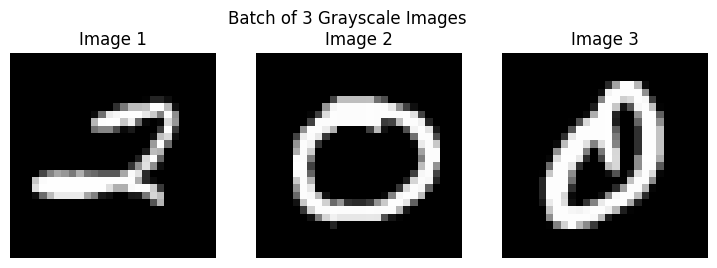

Batch shape: (60000, 1, 28, 28)


In [ ]:
# Create a batch of 60000 grayscale images
batch_images = X_train

# Visualize 3 images
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for i in range(3):
    # Squeeze the image to remove the extra dimension
    image_to_display = batch_images[i].squeeze()
    axes[i].imshow(image_to_display, cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.suptitle("Batch of 3 Grayscale Images")
plt.show()

print("Batch shape:", batch_images.shape)  # (60000, 28, 28)


- Retain only the high-variance impacting features, reducing dimensions
- To do this we are performing two types of embeddings, PCA and t-SNE, as two approaches

(60000, 1, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training data shape: (42000, 784)
Testing data shape: (18000, 784)


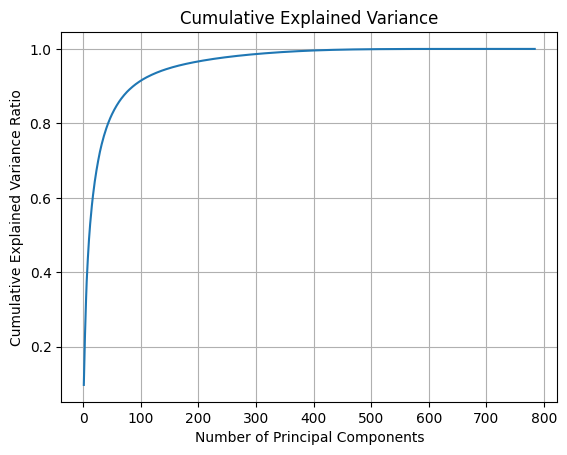

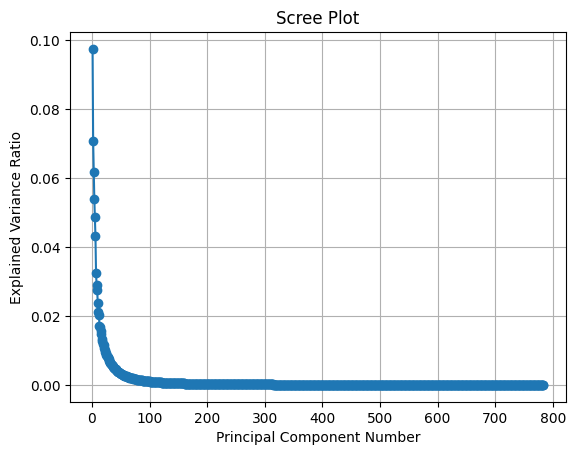

Number of components to retain 97% variance: 214
Original data shape: (42000, 784)
Reduced data shape: (42000, 214)


In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
print(reshaped_X_train.shape)
print(reshaped_X_train)

# Split the data into training and testing sets
train_data, test_data = train_test_split(reshaped_X_train, test_size=0.3, random_state=42) # random_state for reproducibility

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Normalize the dataset into [0,1] so to standardize the features values
# remove any bias towards features having higher value when doing PCA
train_data = train_data / 255.0

# Initialize PCA
pca = PCA()
pca.fit(train_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the number of components to retain a certain percentage of variance
n_components = np.argmax(cumulative_variance_ratio >= 0.97) + 1 # For 97% variance
print(f"Number of components to retain 97% variance: {n_components}")

# You can then re-initialize PCA with the chosen number of components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(train_data)

print(f"Original data shape: {train_data.shape}")
print(f"Reduced data shape: {X_reduced.shape}")

- We are also trying the approach of viewing the clusters in 2D using t-SNE, without reducing the features

(60000, 1, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Starting t-SNE embedding...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.020s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 60000 samples in 250.735s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 600

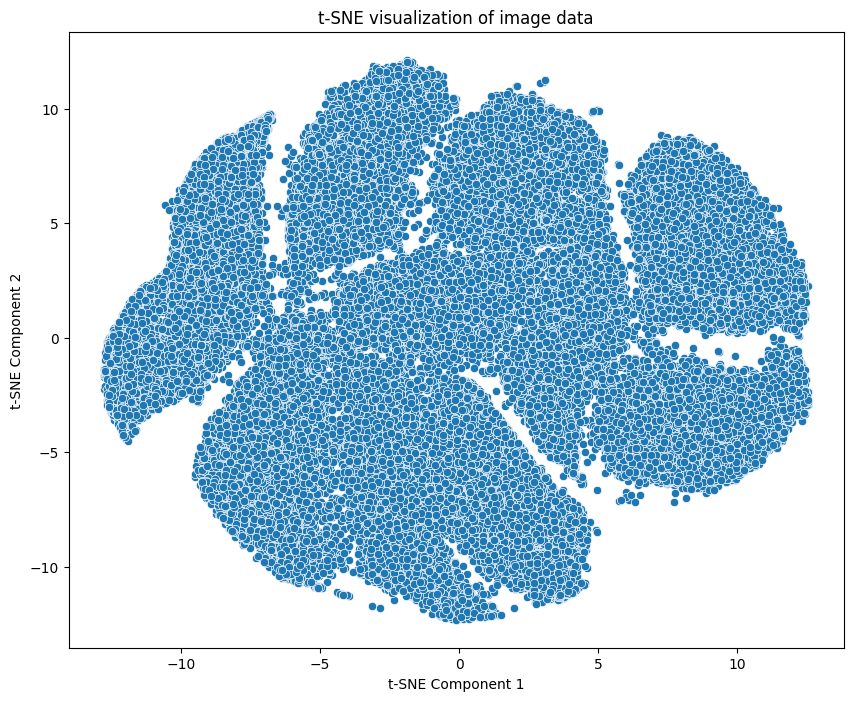

In [20]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
print(reshaped_X_train.shape)
print(reshaped_X_train)

# Normalize the dataset into [0,1] so to standardize the features values
# remove any bias towards features having higher value when doing PCA
reshaped_X_train = reshaped_X_train / 255.0

# Initialize t-SNE
# You can experiment with different parameters:
# - n_components: The dimension of the embedded space (usually 2 or 3)
# - perplexity: Related to the number of nearest neighbors used in manifold learning.
#               Typical values are between 5 and 50. Larger datasets often benefit
#               from higher perplexity.
# - n_iter: Maximum number of iterations for the optimization. Higher values
#           can lead to better embeddings but take longer.
# - random_state: For reproducibility.
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, verbose=1)

print("Starting t-SNE embedding...")
# Fit and transform the data
X_embedded = tsne.fit_transform(reshaped_X_train)
print("t-SNE embedding finished.")

# Create a new dataframe for the embedded data
df_embedded = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

# Now you can visualize the embedded data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', data=df_embedded) # If you have labels, add 'hue='label''
plt.title('t-SNE visualization of image data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- We would also try the approach of viewing the clusters in 2D using t-SNE, with reducing the features by applying PCA first and then doing t-SNE on the reduced features

(60000, 1, 28, 28)
(60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


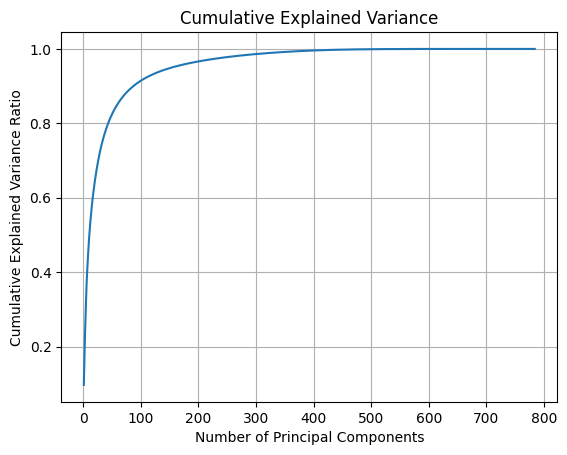

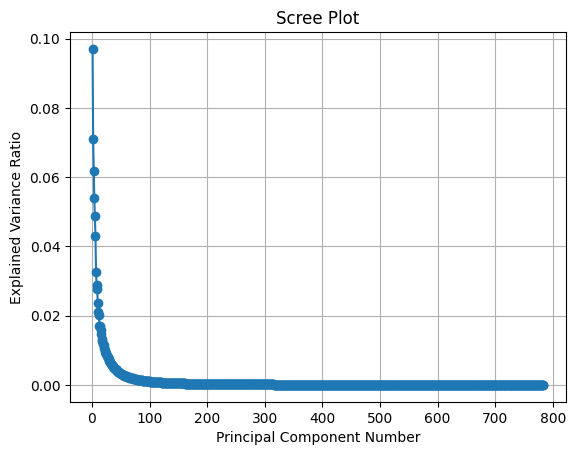

Number of components to retain 97% variance: 214
Original data shape: (60000, 784)
Reduced data shape: (60000, 214)
Starting t-SNE embedding on PCA reduced dataset...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.010s...
[t-SNE] Computed neighbors for 60000 samples in 82.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed c

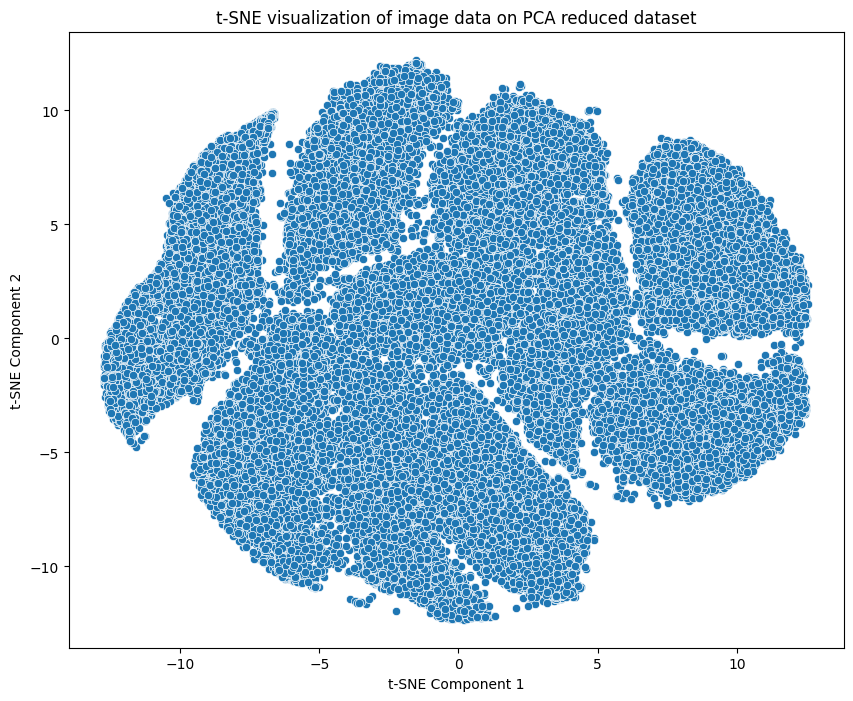

In [21]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

# the data shape is
# this is a dataset of 60000 (60k) images each of size 28 pixels
# by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
print(X_train.shape)

# trying to reshape
reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
print(reshaped_X_train.shape)
print(reshaped_X_train)

# Normalize the dataset into [0,1] so to standardize the features values
# remove any bias towards features having higher value when doing PCA
reshaped_X_train = reshaped_X_train / 255.0

# Initialize PCA
pca = PCA()
pca.fit(reshaped_X_train)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose the number of components to retain a certain percentage of variance
n_components = np.argmax(cumulative_variance_ratio >= 0.97) + 1 # For 97% variance
print(f"Number of components to retain 97% variance: {n_components}")

# You can then re-initialize PCA with the chosen number of components
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(reshaped_X_train)

print(f"Original data shape: {reshaped_X_train.shape}")
print(f"Reduced data shape: {X_reduced.shape}")

# Initialize t-SNE
# You can experiment with different parameters:
# - n_components: The dimension of the embedded space (usually 2 or 3)
# - perplexity: Related to the number of nearest neighbors used in manifold learning.
#               Typical values are between 5 and 50. Larger datasets often benefit
#               from higher perplexity.
# - n_iter: Maximum number of iterations for the optimization. Higher values
#           can lead to better embeddings but take longer.
# - random_state: For reproducibility.
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42, verbose=1)

print("Starting t-SNE embedding on PCA reduced dataset...")
# Fit and transform the data
X_embedded = tsne.fit_transform(X_reduced)
print("t-SNE embedding finished on PCA reduced dataset.")

# Create a new dataframe for the embedded data
df_embedded = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

# Now you can visualize the embedded data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', data=df_embedded) # If you have labels, add 'hue='label''
plt.title('t-SNE visualization of image data on PCA reduced dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- Now choosing a clustering algorithm for grouping the data points so to extract the labels
- We do the clustering using K-Means on PCA reduced data set.
- PCA reduced covers anywhere between 75% to 95% variance and is user driven

Original data shape: (60000, 1, 28, 28)
Reshaped data shape: (60000, 784)


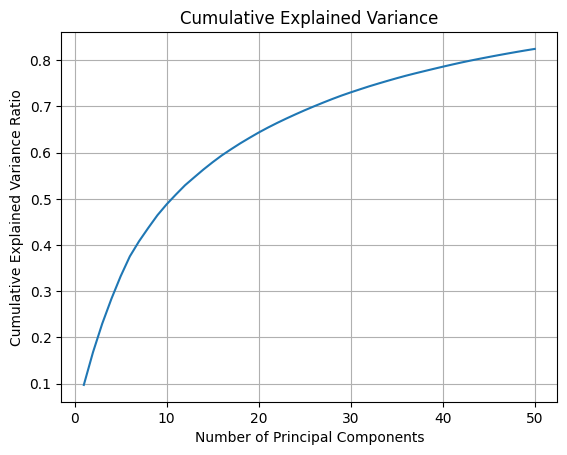

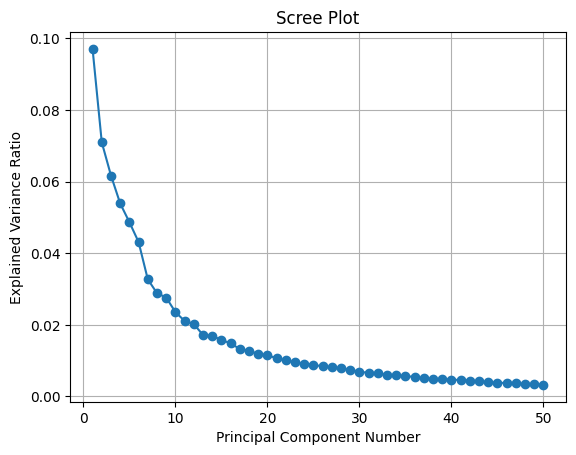

Number of features/components to retain 75.0% variance: 34
PCA Reduced data shape: (60000, 34)
Silhouette Score: 0.1099 for K 8 and Variance Coverage 75.0%


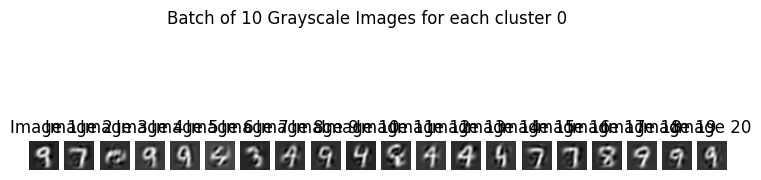

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Main function to put everything together
def create_labels_for_unlabeled_dataset(X_train):

  #X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')

  #STEP 1 - Preprocess images
  # the data shape is
  # this is a dataset of 60000 (60k) images each of size 28 pixels
  # by 28 pixels (28 x 28) with only 1 channel (meaning grayscale image)
  print(f"Original data shape: {X_train.shape}")

  # trying to reshape
  reshaped_X_train = X_train.reshape(X_train.shape[0], -1)
  print(f"Reshaped data shape: {reshaped_X_train.shape}")

  #STEP 1.1 (Optional) : Divide data set into 75%-training and 25%-testing
  # Split the data into training and testing sets
  train_data, test_data = train_test_split(reshaped_X_train, test_size=0.25, random_state=42) # random_state for reproducibility

  # JUST FOR TESTING WE ARE NOW OVER-WRITING 70% TRAIN-DATA WITH COMPLETE-FULL DATA
  # FOR TESTING ONLY, REMOVE THE BELOW LINE IF WE WANT TO USE 70% TRAIN DATA (train_data)
  train_data = reshaped_X_train

  # Normalize the dataset into [0,1] so to standardize the features values
  # remove any bias towards features having higher value when doing PCA
  train_data = train_data / 255.0

  # STEP 2: CREATE EMBEDDINGS / ENCODING
  # Initialize PCA
  pca = PCA(50)
  pca.fit(train_data)

  # Get the explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_

  # Plot the cumulative explained variance ratio
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
  plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance Ratio')
  plt.title('Cumulative Explained Variance')
  plt.grid(True)
  plt.show()

  plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
  plt.xlabel('Principal Component Number')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Scree Plot')
  plt.grid(True)
  plt.show()

  # STEP 3: FIND OPTIMAL NUMBER OF CLUSTERS
  # Choose the number of components to retain a certain percentage of variance
  variance_coverage = 0.75
  n_components = np.argmax(cumulative_variance_ratio >= variance_coverage) + 1 # For 75% variance
  print(f"Number of features/components to retain {variance_coverage*100.0}% variance: {n_components}")

  # Re-initialize PCA with the optimal number of components
  pca_reduced = PCA(n_components=n_components)
  X_reduced = pca_reduced.fit_transform(train_data)

  print(f"PCA Reduced data shape: {X_reduced.shape}")

  # STEP 4: APPLY CLUSTERING AND EXTRACT LABELS
  k = 8  # For MNIST-like image data
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, algorithm='elkan')
  labels = kmeans.fit_predict(X_reduced)

  # Calculate silhouette score to evaluate clustering quality
  silhouette_avg = silhouette_score(X_reduced, labels)
  print(f"Silhouette Score: {silhouette_avg:.4f} for K {k} and Variance Coverage {variance_coverage*100.0}%")

  # STEP 5: GATHER CLUSTERING DATA BY PCA Component
  # Create a DataFrame to store the clustering data
  clustering_data = pd.DataFrame({'PCA_Component_' + str(i+1): X_reduced[:, i] for i in range(k)})
  clustering_data['Cluster'] = labels

  # STEP 5.1 (Optional): Write the clustering data to a CSV file
  #clustering_data.to_csv('/content/sample_data/pca_kmeans_clustering_dataK8-75Variance.csv', index=False)
  #print("\nClustering data written to '/content/sample_data/pca_kmeans_clustering_dataK10-75Variance.csv'")

  # STEP 6 : ASSIGN LABELS BASED ON CLUSTER (Y_train)
  # The cluster assignments themselves can serve as the pseudo-labels.
  Y_train = labels

  # Create a DataFrame to store the assigned labels with the original data (optional but useful)
  labeled_data = pd.DataFrame(train_data)
  labeled_data['Assigned_Label'] = Y_train

  # STEP 6.1 (Optional) : Write the labeled data to a CSV file
  #labeled_data.to_csv('/content/sample_data/pca_kmeans_labeled_dataK8-75Variance.csv', index=False)
  #print("\nLabeled data with assigned labels written to '/content/sample_data/pca_kmeans_labeled_dataK8-95Variance.csv'")

  # Number of clusters for which to print the images for viewing
  n_cluster_to_print_image = k

  # STEP 7 (Optional) : VISUALIZE 20 IMAGES FROM EACH CLUSTER SO TO CHECK HOW K-MEANS CLUSTERING HAS PERFORMED
  for i in range(0,n_cluster_to_print_image):

      row = np.where(labels==i)[0]  # row in labels for elements of cluster i
      num = row.shape[0]            # number of elements for each cluster
      r = int(np.floor(num/10.))    # number of rows in the figure of the cluster

      # Only take up to 20 images from a cluster
      n_display = min(20, num)

      # Visualize 'n_display' number of images
      fig, axes = plt.subplots(1, n_display, figsize=(9, 3))
      for k in range(n_display):
          # Squeeze the image to remove the extra dimension
          image_to_display = X_reduced[row[k], :].squeeze()
          # Invert the PCA transformation to reconstruct the original image
          image = pca_reduced.inverse_transform(image_to_display) # Reconstruct the original image
          # Reshape the original image to (28,28) to get it back into image format
          image = image.reshape(28, 28)
          axes[k].imshow(image, cmap='gray')
          axes[k].set_title(f"Image {k+1}")
          axes[k].axis('off')

      plt.suptitle(f"Batch of 10 Grayscale Images for each cluster {i}")
      plt.show()

      # Return the labels, embeddings (X_reduced in this case), kmeans model, and pca model
      return Y_train, X_reduced, kmeans, pca_reduced

# Example usage of the program
X_train = np.load('/content/sample_data/unlabelled_train_data_images.npy')
Y_train, embeddings, kmeans_model, pca_model = create_labels_for_unlabeled_dataset(X_train)

# Text Dataset

In [ ]:
import pickle

X_train_text = pickle.load(open('/content/sample_data/train_data_text.pkl', 'rb'))

In [ ]:
X_train_text[0]
print(len(X_train_text))
print(type(X_train_text))
print(X_train_text)

# Specify the output file path
output_file_path = os.path.join('/content/sample_data', 'train_data_text.txt')

# Open the file in write mode ('w')
with open(output_file_path, 'w') as f:
    # Iterate through each item in X_train_text and write it to the file
    for item in X_train_text:
        f.write(str(item) + '\n')  # Convert to string and add a newline


1500
<class 'list'>
["\nIn article <93089.204431GRV101@psuvm.psu.edu> Callec Dradja <GRV101@psuvm.psu.edu> writes:\n>I am a bit nervous about posting this beacause it is begining to\n>stray fron the topic of space but then again that doesn't seem to\n>stop alot of other people. :-)\n>\n>With all of this talk about breathing at high pressures, I began\n>to think about the movie Abyss. If you remember, in that movie one\n>of the characters dove to great depths by wearing a suit that used\n>a fluid that carries oxegen as opposed to some sort of gas. Now I\n>have heard that mice can breath this fluid but for some reason, humans\n>are unable to. Does anyone know more details about this?\n>\n>Gregson Vaux\n>\n\nI believe the reason is that the lung diaphram gets too tired to pump\nthe liquid in and out and simply stops breathing after 2-3 minutes.\nSo if your in the vehicle ready to go they better not put you on \nhold, or else!! That's about it. Remember a liquid is several more times\nas d